In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn.decomposition import PCA

from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import sklearn
import time
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# from MSU_prepare_data import prepare_data

# For saving
import pickle

# Evaluation
from sklearn.metrics import accuracy_score

# Methods
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity

%matplotlib inline
rcParams['figure.figsize'] = 10, 10
sb.set_style('whitegrid')

In [17]:
#from MSU_prepare_data import prepare_data  # Read Data 

In [18]:
#!/usr/bin/env python
# coding: utf-8




import os
from pandas import DataFrame, read_csv
import pandas as pd
from sklearn import preprocessing
import numpy as np

from imblearn.over_sampling import SMOTENC


def prepare_data( TrainingPhase, OriginalDfUnmodified):

    #This function returns original dataframe, dataframe without Term
    # Reason, dataframe with categorical values converted to dummy
    # variables, dataframe with one dummy varable dropped to avoid
    # multi-collinearlity, dataframe with categorical values mapped
    # to numeric values [0 - n-1] for Spearsman coefficient
    # and standardized dataframe 
    
    # Separating out response variable from predictor variables can be
    # done outside this function as we may need dataframes to have both
    # predictors and output for some visualizations w.r.t output
    # variable Standardization is left out of this function so that
    # based on model being applied later, appropriate dataframe could
    # be used from here and standaridized, rather than standardizing
    # everyting here and impacting models which doesn't need specific
    # standardizing

    #Original DataFrame  without any modifications    
    
    if OriginalDfUnmodified.empty :
        print('In Empty DF')
#         data_path = os.path.join(
#            os.path.split(os.path.abspath(__file__))[0],
#            os.pardir,
#            'data',
#            'MSU_HR_Datasets.csv')
        OriginalDfUnmodified = pd.read_csv('MSU_HR_Datasets.csv')
    
    #OriginalDfUnmodified  = pd.read_csv('./data/MSU_HR_Datasets.csv')

    #Drop Term Reason as this feature is only for terminated employee.
    # We will use this feature to 
    #just plot reasons of leaving and not use in classification
    DfwithoutTermReasonUnmodified = OriginalDfUnmodified.drop(
        'Term Reason', axis=1)

    # Split original df into X and Y
    Y = DfwithoutTermReasonUnmodified[['Employee Status']].copy()
    X = DfwithoutTermReasonUnmodified.drop('Employee Status', axis=1)  

    column_names = DfwithoutTermReasonUnmodified.columns
    if TrainingPhase == True :     
        # Perform SMOTE on OriginalDf
        df_resampled, Y_resampled = \
            SMOTENC(categorical_features=[0, 1, 2, 4, 5, 6, 7, 10, 17, 18, 19]).fit_resample(X.values, Y.values)
        # df_resampled = pd.DataFrame(df_resampled, columns=column_names)
        # Y_resampled = pd.DataFrame(Y_resampled, columns=['Employee Status'])
        # DfwithoutTermReason = pd.concat([df_resampled, Y_resampled])
        Y_resampled = Y_resampled.reshape(Y_resampled.shape[0], 1)
        tmp = np.concatenate((df_resampled,Y_resampled),axis=1)
        DfwithoutTermReason = pd.DataFrame(tmp, columns=column_names)
    else:
        DfwithoutTermReason = DfwithoutTermReasonUnmodified
        
    DfwithoutTermReason['Employee Status'] = DfwithoutTermReason['Employee Status'].astype('category')
    #DataFrame with dummy variables for cateogrical variables
    DfCategoricalUnmodified = DfwithoutTermReasonUnmodified.copy();
    
    Df_DummyVars_SMOTE , Df_DummyVars_OneOut_SMOTE , Df_Onehot_SMOTE   = Convert_Categorical(DfwithoutTermReason)
    Df_DummyVars_NON_SMOTE , Df_DummyVars_OneOut_NON_SMOTE , Df_Onehot_NON_SMOTE = Convert_Categorical(DfCategoricalUnmodified)

    return DfCategoricalUnmodified, \
           OriginalDfUnmodified, \
           DfwithoutTermReason, \
           Df_DummyVars_SMOTE, \
           Df_DummyVars_OneOut_SMOTE, \
           Df_Onehot_SMOTE,\
           Df_DummyVars_NON_SMOTE, \
           Df_DummyVars_OneOut_NON_SMOTE, \
           Df_Onehot_NON_SMOTE\

def Convert_Categorical(InputDf):
    DfwithDummyVars = InputDf.copy();

     # Create dummy variables
    categorical_vars = ['Unit Name',
                            'Gender',
                            'Race',
                            'Home State',
                            'Personnel Subarea',
                            'Employee Group',
                            'Benefit Status',
                            'EEO Name',
                            'Marital Status',
                            'Spouse working at MSU'
                            ]
    #Convert categorical attributes to dummy variables
    for v in categorical_vars:
            for elem in DfwithDummyVars[v].unique():
                DfwithDummyVars[v + '_' + str(elem)] = \
                    DfwithDummyVars[v] == elem
                DfwithDummyVars[v + '_' + str(elem)] = \
                    DfwithDummyVars[v + '_' + str(elem)].astype(int)
    # Convert True/False to 1/0
    DfwithDummyVars = DfwithDummyVars.drop(categorical_vars, axis=1)

    # Drop one dummy variable from each category to prevent
    # multicollinearity
    my_cols = DfwithDummyVars.columns
    cols_to_drop = list()
    for x in categorical_vars:
         tmp = [k for k in my_cols if k.startswith(x)]
         cols_to_drop.append(tmp[0])
    DfwithOneDummyOut = DfwithDummyVars.drop(cols_to_drop, axis=1)

    #To use SPearsman correlation Coefficient Categorical varaibles
    # are mapped to fixed set of numeric variables
    Df_one_hot_Caegorical = InputDf.copy();

    for v in categorical_vars:
        Df_one_hot_Caegorical[v] = Df_one_hot_Caegorical[v].astype('category')
        Df_one_hot_Caegorical[v] = Df_one_hot_Caegorical[v].cat.codes
        
    return DfwithDummyVars, DfwithOneDummyOut ,Df_one_hot_Caegorical   

In [19]:
myEmptyDf = pd.DataFrame()
myEmptyDf.head()

""


In [ ]:
my_data_frame = pd.read_csv('MSU_HR_Datasets.csv')
my_data_frame.head()

In [ ]:
#Plot Termination Reason by Count for terminated employee    
myEmptyDf = pd.DataFrame()
[DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, DfwithDummyVars, DfwithOneDummyOut, DfMappedCaegorical, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE] = prepare_data(True,myEmptyDf)
plt.figure(figsize=(10, 6))
y = sb.countplot(y='Term Reason', data=OriginalDfUnmodified,palette='hls',order = OriginalDfUnmodified['Term Reason'].value_counts().index)
plt.savefig('Reason_for_leaving')
plt.show()

In [ ]:
sb.countplot(x='Employee Status',data=DfwithDummyVars,palette='hls')

In [ ]:
sb.countplot(x='Employee Status',data=OriginalDfUnmodified,palette='hls')

### Standardization of features - One Hot encoding for categorical 

In [24]:
#Pair plot of continuous predictor variables 
DfPredictors =  DfMappedCaegorical.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = DfMappedCaegorical["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
ScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(ScaledData,columns=DfPredictors.columns)
DfStandardized_onehot = DfStandardized.astype('float64')
DfStandardized_onehot['Employee Status'] = DfTargetValue ['Employee Status']

### Pair plot of features 

In [ ]:
#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
DfStandardized_onehot['Employee Status'] = DfStandardized_onehot['Employee Status'].astype('category')
#DfStandardized_onehot_Subset = DfStandardized_onehot[['Age','Years Of Service','Years Until Retirement Eligib','FTE_Slalary','Avg_sal_diff_from_peers','total % salary increase since joined every year','Last Percent hike in salary','Employee Status']]
DfStandardized_onehot_Subset = DfStandardized_onehot[['Age','Years Of Service','Years Until Retirement Eligib','Employee Status']]
pairplotSb = sb.pairplot(DfStandardized_onehot_Subset,hue='Employee Status', palette='hls')
pairplotSb.savefig("pairplot_onehot_Age_YOS_RetYears.jpeg")

In [ ]:
DfStandardized_onehot_Subset = DfStandardized_onehot[['Years in Level','Years in Position','Employee Status']]
pairplotSb = sb.pairplot(DfStandardized_onehot_Subset,hue='Employee Status', palette='hls')
pairplotSb.savefig("pairplot_years_level.jpeg")

DfStandardized_onehot_Subset = DfStandardized_onehot[['FTE_Slalary','Last Percent hike in salary','Employee Status']]
pairplotSb = sb.pairplot(DfStandardized_onehot_Subset,hue='Employee Status', palette='hls')
pairplotSb.savefig("pairplot_onehot_salaries.jpeg")


In [ ]:
#Check Correlation between continuos variabl
DfStandardized_onehot_Subset_Heatmap = DfStandardized_onehot[['Age','Years Of Service','Years Until Retirement Eligib','FTE_Slalary','Avg_sal_diff_from_peers','total % salary increase since joined every year','Last Percent hike in salary','Employee Status']]
DfContinuousVars = DfStandardized_onehot_Subset_Heatmap.drop('Employee Status', axis=1)
DfContinuousVars = DfContinuousVars.astype('float64')
Corr = DfContinuousVars.corr()
hm_sb = sb.heatmap(Corr,xticklabels=Corr.columns.values, yticklabels=Corr.columns.values)

In [ ]:
#Check Coorelation between Categorical variables 
DfMappedSubsetCategory = DfMappedCaegorical[['Unit Name','Home State','Gender','Race','EEO Name','Marital Status','Spouse working at MSU','Employee Status']]
pd.crosstab(DfMappedSubsetCategory["Employee Status"],DfMappedSubsetCategory["Spouse working at MSU"])
#Check Correlation between categorical variables using Spearman
CategorCorr = DfMappedSubsetCategory.corr('spearman')
sb.heatmap(CategorCorr,xticklabels=CategorCorr.columns.values, yticklabels=CategorCorr.columns.values)

### Principal Component Analysis

In [31]:
#Principal Component Analysis 
#Separate Predictor and target variable 
DfPredictors =  DfwithOneDummyOut.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = DfwithOneDummyOut["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
ScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(ScaledData,columns=DfPredictors.columns)
#Set the model
pca = PCA(.95)
#Transform the data using PCA 
DfStandardizedf64 = DfStandardized.astype('float64')
Attr_pca = pca.fit_transform(DfStandardizedf64)
#Explained Variance Ratio with 2 principal components 
print("Variance in data captured by first two Principal Components is - " , str(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]))
#Number of Components required for .95
print("Number of principal components required to capture variance of 95% is  " , str(len(pca.components_)) )

Variance in data captured by first two Principal Components is -  0.08339088206442008
Number of principal components required to capture variance of 95% is   98


### Linear Discriminant Analysis ( Tried to be used later in analysis )

In [ ]:
import numpy as np

def get_class_data(dataset,label,index):
    #Split the data into different class 
    class_data = dataset[:,index] == label 
    return dataset[class_data]

def get_scatter_matrix(dataset):    
    mean_vector = np.mean(dataset,axis = 0)    #Calculate Mean 
    Z = np.subtract(dataset,mean_vector.reshape(1,mean_vector.shape[0])) #Subtract mean vector from dataset 
    S = np.matmul(np.transpose(Z),Z)
    return S

#datasets = read_imox_dataset('./imox_data.txt')
npData = np.array(DfStandardizedf64.values)
npTarget = np.array(DfTargetValue.values)
datasets = np.append(npData,npTarget.reshape(npData.shape[0],1),axis=1)

#remove labels 
data_no_label = datasets[:,0:-1]
#get samples per class 1 
Class1 = get_class_data(datasets,1,datasets.shape[1]-1 )[:,0:-1]
#get samples per class 2 
Class2 = get_class_data(datasets,0,datasets.shape[1]-1)[:,0:-1]
#get samples per class 3
#get scatter matrix 
scatter_matrix_1 = get_scatter_matrix(Class1)
#get scatter matrix 
scatter_matrix_2 = get_scatter_matrix(Class2)


#Calculate SW  within scatter matrix 
SW = scatter_matrix_1 + scatter_matrix_2

mu = np.mean(datasets[:,0:-1],axis=0)

#Calculate between scatter matrix 
mu1 = np.mean(Class1,axis=0)
mu2 = np.mean(Class2,axis=0)
SB1 = Class1.shape[0]*np.outer((mu1-mu),(mu1-mu))
SB2 = Class2.shape[0]*np.outer((mu2-mu),(mu2-mu))

SB = SB1 + SB2 

#calculate W 
W = np.matmul(np.linalg.inv(SW),SB) 

eigVal,EigVec = np.linalg.eig(W)
#Get index of first and second eigen values to get corresponding eigen vectors
c = np.argsort(eigVal)
index_first_eig = c[-1]
index_second_eig = c[-2]
#Get first and second principal component vectors 
pc_1 = EigVec[:,index_first_eig]
pc_2 = EigVec[:,index_second_eig]
#Report 
print("First Principal Componet Vector" , pc_1)
print("Second Principal Component Vector" , pc_2)

#Create Projection matrix 
transform_matrix = np.column_stack([pc_1,pc_2])
#Project data using the two components
projected_data = np.matmul(data_no_label , transform_matrix)
#projected data with labels 
projected_data_labels = np.append(projected_data,datasets[:,-1].reshape(datasets.shape[0],1),axis=1)











### Whitening Transform ( Heat Map shows effect)

In [35]:
#Principal Component Analysis 
#Separate Predictor and target variable 
DfPredictors =  DfwithOneDummyOut.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = DfwithOneDummyOut["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
ScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(ScaledData,columns=DfPredictors.columns)
#Set the model
pca = PCA(whiten=True)
#Transform the data using PCA 
DfStandardizedf64 = DfStandardized.astype('float64')
Transformed_Data_Whiten = pca.fit_transform(DfStandardizedf64.values)
#Explained Variance Ratio with 2 principal components 
print("Variance in data captured by first two Principal Components is - " , str(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]))
#Number of Components required for .95
print("Number of principal components required to capture variance of 95% is  " , str(len(pca.components_)) )

Variance in data captured by first two Principal Components is -  0.08339088206442008
Number of principal components required to capture variance of 95% is   121


In [ ]:
TransfromedDf = pd.DataFrame(Transformed_Data_Whiten, columns=DfPredictors.columns)
TransfromedDf_Subset_Heatmap = TransfromedDf[['Age','Years Of Service','Years Until Retirement Eligib','FTE_Slalary','Avg_sal_diff_from_peers','total % salary increase since joined every year','Last Percent hike in salary']]
DfTransformedContinuousVars = TransfromedDf_Subset_Heatmap.astype('float64')
Corr = DfTransformedContinuousVars.corr()
hm_sb_trans = sb.heatmap(Corr,xticklabels=Corr.columns.values, yticklabels=Corr.columns.values)

### Building of models and classifiers to be used in analysis

In [37]:
#Function to optimize hyperparameters for classifier 
def optimize_hyperparam(method, hyperparams_particular,
                        inner_cv, X_train, y_train):
    
    best_params = {}
    
    if method == "RandomForestClassifier":   
        best_params, best_pipe = callRandomForestClassifier(X_train, y_train,
                                                            inner_cv)    
        return best_params, best_pipe
    if method == "AdaBoostClassifier":   
        best_params, best_pipe = callAdaBoostClassifier(X_train, y_train,
                                                            inner_cv)    
        return best_params, best_pipe
    if method == "GradientBoostClassifier":   
        best_params, best_pipe = callGradientBoostClassifier(X_train, y_train,
                                                            inner_cv)    
        return best_params, best_pipe
    elif method == "LinearSVM":
        best_params, best_pipe = callLinearSVMClassifier(X_train, y_train,
                                                         inner_cv)    
        return best_params, best_pipe
    elif method == "KernelSVM":
        best_params, best_pipe = callKernelSVMClassifier(X_train, y_train,
                                                         inner_cv)    
        return best_params, best_pipe
    
    elif method == "ANN":    
        best_params, best_pipe = callANNClassifier(X_train, y_train, inner_cv)    
        return  best_params, best_pipe    
    
    elif method == "NaiveBayes":
        best_params, best_pipe = callNaiveBayesClassifier(X_train, y_train,
                                                          inner_cv)        
        return best_params, best_pipe
    elif method == "LogisticRegression":
        best_score = 0
        for lambd in hyperparams_particular:
            inner_scores = []
            print(X_train.shape)
            print(y_train.shape)
            for itrain_idx, val_idx in inner_cv.split(X_train, y_train):
                X_itrain, X_val = X_train[itrain_idx], X_train[val_idx]
                y_itrain, y_val = y_train[itrain_idx], y_train[val_idx]
                pipe = Pipeline(
                    [['sc', StandardScaler()],
                     ['model', LogisticRegression(C=lambd,
                                                  penalty='l1',
                                                  solver='saga')]])
                pipe.fit(X_itrain, y_itrain.ravel())
                y_pred = pipe.predict(X_val)
                inner_scores.append(accuracy_score(y_val, y_pred))
            score_mean = np.mean(inner_scores)
            if best_score < score_mean:
                best_lambd  = lambd
                best_pipe = pipe
        best_params = {'lamda' : best_lambd}            
    return best_params, best_pipe


def calculate_discriminant(input_sample,mean_vector,covariance):
    #Calculate normal distribution value for given input 
    return multivariate_normal.pdf(input_sample, mean_vector, covariance,allow_singular=True)

def predict_class(input_sample,mu1,cov1,mu2,cov2):
#Caluclate class conditional density for each class for a given point , since it is 0-1 loss and classes are equal probable posterior is proportional to class conditional densities    
    Scores = np.array([calculate_discriminant(input_sample,mu2,cov2),calculate_discriminant(input_sample,mu1,cov1)])
    return(np.argmax(Scores))


def find_parameters_MLE(class_data):    
    #Mean 
    MeanVector = np.mean(class_data,axis = 0)
    tCov = np.transpose(class_data)    
    Covariance = np.cov(tCov.astype(np.float32),bias=True)  
    return MeanVector,Covariance

def find_parameters_independent_features(class_data):    
    #Mean 
    mu = np.mean(class_data,axis = 0)
    #Covariance 
    var = np.var(class_data,axis=0) #variance 
    covar = np.diag(var)            #Create covariance matrix with variance on diag as features are independent 
    return mu,covar    
    
    
    
    return MeanVector,Covariance

def Bayes_Multivariate_train(data,label):  
    class1 = data[np.argwhere(label==1).flatten()]
    class2 = data[np.argwhere(label==0).flatten()] 
    
    
    #Find parameters class 1 
    mu1 , cov1 = find_parameters_MLE(class1)
    #Find parameters class 2
    mu2 , cov2 = find_parameters_MLE(class2)
    return mu1,cov1,mu2,cov2

    
def Bayes_Multivariate_predict(dataset,mu1,cov1,mu2,cov2):
    
    output = np.empty(dataset.shape[0])
    for i in range(dataset.shape[0]):
        output[i] = predict_class(dataset[i],mu1,cov1,mu2,cov2)
    return output    

def Bayes_Independent_Features_train(data,label):  
    class1 = data[np.argwhere(label==1).flatten()]
    class2 = data[np.argwhere(label==0).flatten()] 
    
    
    #Find parameters class 1 
    mu1 , cov1 = find_parameters_independent_features(class1)
    #Find parameters class 2
    mu2 , cov2 = find_parameters_independent_features(class2)
    return mu1,cov1,mu2,cov2

def window_function_value(x,d):
    mean_vector =  np.zeros(d)
    CoVar =  np.identity(d)   
    value = multivariate_normal.pdf(x, mean_vector, CoVar)
    return(value)

def delta_n(Hn,Vn,x,d):
    kernel_value = window_function_value(x/Hn,d)
    return_value = kernel_value / Vn
    return return_value


def density_estimate(Hn,x,train_samples,d):
    temp_val = 0 
    Vn = Hn**d
    for i in range(train_samples.shape[0]):
        temp_val = temp_val + delta_n(Hn,Vn,(x - train_samples[i]),d)
    density_val = temp_val / train_samples.shape[0]
    return(density_val)
    
def calculate_discriminant_parzen(input_sample,train_data):
    #Calculate parzen estimate value for given input 
    Hn = 1 
    d = train_data.shape[1]
    return density_estimate(Hn,input_sample,train_data,d)

def predict_class_Parzen(input_sample,class1,class2):
#Caluclate class conditional density for each class for a given point , since it is 0-1 loss and classes are equal probable posterior is proportional to class conditional densities    
    Scores = np.array([calculate_discriminant_parzen(input_sample,class2),calculate_discriminant_parzen(input_sample,class1)])
    return(np.argmax(Scores)) 

def Parzen_model(test_set,prototype,label):    
    
    class1 = prototype[np.argwhere(label==1).flatten()]
    class2 = prototype[np.argwhere(label==0).flatten()] 
    output = np.empty(test_set.shape[0])    
    for i in range(test_set.shape[0]):        
        output = predict_class_Parzen(test_set[i],class1,class2)
    return output  
from sklearn.base import BaseEstimator, ClassifierMixin
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[np.argwhere(y==yi).flatten()] for yi in self.classes_]
#         class1 = X[np.argwhere(y==1).flatten()]
#         class2 = X[np.argwhere(y==0).flatten()] 
        #training_sets = np.array([class1]
        
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]


def main_loop(methods_str, hyperparams, X, y):    
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

    outer_fold = []
    scores = []
    for i in range(5):
        outer_fold.append({})
    
    for i, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        results = {}
        for method in methods_str:
            results.update({method: {}})
        for method in methods_str:            
            #print("Starting Fold " , i+1 , "of method " , method)
            
            if method == "Bayes_Multivariate" :                                
                mu1,cov1,mu2,cov2 = Bayes_Multivariate_train(X_train,y_train)
                y_pred = Bayes_Multivariate_predict(X_test,mu1,cov1,mu2,cov2)
                best_params = {'mu1' : mu1 , 'cov1':cov1 , 'mu2' : mu2 , 'cov2' : cov2}
                best_pipe = {}
            elif method == "Bayes_Independent_Features":
                mu1,cov1,mu2,cov2 = Bayes_Independent_Features_train(X_train,y_train)
                y_pred = Bayes_Multivariate_predict(X_test,mu1,cov1,mu2,cov2)
                best_params = {'mu1' : mu1 , 'cov1':cov1 , 'mu2' : mu2 , 'cov2' : cov2}
                best_pipe = {}                
            elif method =="Parzen_Window":
                bandwidths = 10 ** np.linspace(0, 2, 100)
                #bandwidths = 1 
                grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
                grid.fit(X_train, y_train)
                y_pred = grid.predict(X_test)
                best_params = grid.best_params
                best_pipe = grid.best_pipe                                
            else:   
                
                best_params, best_pipe = optimize_hyperparam(method,
                                                            hyperparams[method],
                                                            inner_cv,
                                                            X_train,
                                                            y_train)
                # Use best lambda on X_train to train model
                # We are skipping tuning of hyperparameters for SVMs due to time and space complexity  and bestpipe is already a trained model on X training                                
                if method != 'LinearSVM' and method != 'KernelSVM' and method != 'ANN':             
                    best_pipe.fit(X_train, y_train.ravel())
                # Predict using X_test
                y_pred = best_pipe.predict(X_test)
                # Compare results from above with y_test
                
            best_lambd_results = classification_report(y_test, y_pred)
            
            
            
            
            
            # Store results from above
            results[method].update(best_params = best_params,
                                   best_pipe = best_pipe,
                                   best_lambd_results = best_lambd_results)
            

            lines = best_lambd_results.split('\n')
            row = {}
            row_data = lines[6].split()
            row['Fold']       = i+1
            row['Classifier'] = method
            row['precision'] = float(row_data[2])
            row['recall'] = float(row_data[3])
            row['f1_score'] = float(row_data[4])
            row['support'] = float(row_data[5])
            scores.append(row)          
            #print("Finished Fold " , i+1 , "of method " , method)
            
            
            
        outer_fold[i] = results
        scoresDf = pd.DataFrame.from_dict(scores)
        
    return outer_fold, scoresDf    
 

#from sklearn.base import BaseEstimator, ClassifierMixin    
    

def callNaiveBayesClassifier(X_train,Y_train, inner_cv):
    parameters = {'nb__alpha':np.linspace(0.1,1,10)}
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('nb', BernoulliNB())
    ])
    nb_random = RandomizedSearchCV(pipe, parameters, n_iter = 8,
                                   cv= inner_cv, verbose=0,
                                   random_state=42, n_jobs = -1,
                                   scoring='accuracy')
    # Fit the random search model
    nb_random.fit(X_train,Y_train.ravel())    
    return nb_random.best_params_, nb_random.best_estimator_ 
    

def callRandomForestClassifier(X_train,Y_train, inner_cv) :

    # Number of trees in random forest
#     n_estimators = [int(x) for x in np.linspace(start = 200,
#                                                 stop = 2000,
#                                                 num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {
        #'rf__n_estimators': n_estimators,
                   'rf__max_features': max_features,
                   'rf__max_depth': max_depth,
                   'rf__min_samples_split': min_samples_split,
                   'rf__min_samples_leaf': min_samples_leaf,
                   'rf__bootstrap': bootstrap}        

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state=42))
        ])
    
    
    rf_random = RandomizedSearchCV(pipe, random_grid, n_iter = 10,
                                   cv = inner_cv, verbose=0,
                                   random_state=42, n_jobs = -1,
                                   scoring='accuracy')
    
    # Fit the random search model
    rf_random.fit(X_train,Y_train.ravel())    
    return rf_random.best_params_, rf_random.best_estimator_

def callAdaBoostClassifier(X_train,Y_train, inner_cv) :       

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('ab', AdaBoostClassifier(random_state=42))
        ])
    
    best_params = {}
    return best_params , pipe

def callGradientBoostClassifier(X_train,Y_train, inner_cv) :

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Create the random grid
    random_grid = {
        #'gb__n_estimators': n_estimators,
                   'gb__max_features': max_features,
                   'gb__max_depth': max_depth,
                   'gb__min_samples_split': min_samples_split,
                   'gb__min_samples_leaf': min_samples_leaf}        

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('gb', GradientBoostingClassifier(random_state=42))
        ])
    
    gb_random = RandomizedSearchCV(pipe, random_grid, n_iter = 10,
                                   cv = inner_cv, verbose=0,
                                   random_state=42, n_jobs = -1,
                                   scoring='accuracy')
    
    # Fit the random search model
    gb_random.fit(X_train,Y_train.ravel())    
    return gb_random.best_params_, gb_random.best_estimator_


def callLinearSVMClassifier(X_train,Y_train, inner_cv) :

    #C_range = [1, 10, 100, 1000]
    #C_range = [1]
    #gamma_range = [0.001, 0.0001]

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores            
    #param_grid = {'svm__C': C_range, 'svm__gamma': gamma_range, 'svm__kernel': ['linear'] }
    #param_grid = {'svm__C': C_range}
   
    
    
    
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', LinearSVC())
        ])
    
    
    #svm_random = RandomizedSearchCV(pipe, param_grid, n_iter = 8, cv = inner_cv, verbose=0, random_state=42, n_jobs = -1,scoring='accuracy')
    
# Fit the random search model
    #svm_random.fit(X_train,Y_train.ravel())    
    pipe.fit(X_train,Y_train.ravel())    
    #return svm_random.best_params_ , svm_random.best_estimator_ 
    best_params = {}
    return best_params , pipe 


def callKernelSVMClassifier(X_train,Y_train, inner_cv) :

   # C_range = [1, 10, 100, 1000]
   # gamma_range = [0.001, 0.0001]
   

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores            
    #param_grid = {'svm__C': C_range, 'svm__gamma': gamma_range, 'svm__kernel': ['rbf'] }
   
    
    
    
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC())
        ])
    
    
    #svm_random = RandomizedSearchCV(pipe, param_grid, n_iter = 8, cv = inner_cv, verbose=0, random_state=42, n_jobs = -1,scoring='accuracy')
    
# Fit the random search model
    #svm_random.fit(X_train,Y_train.ravel())    
    #return svm_random.best_params_ , svm_random.best_estimator_ 
    pipe.fit(X_train,Y_train.ravel()) 
    best_params = {}
    return best_params , pipe 

def callANNClassifier(X_train,Y_train, inner_cv) :

    #parameter_space = {
    #'ann__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    #'ann__activation': ['tanh', 'relu' , 'Sigmoid'],
    #'ann__solver': ['sgd', 'adam'],
    #'ann__alpha': [0.0001, 0.05],
    #'ann__learning_rate': ['constant','adaptive'], }
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores        
    #pipe = Pipeline(steps=[('sc', StandardScaler()), ('RForest',RandomForestClassifier())])
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('ann', MLPClassifier())
         ])
    #ann_random = RandomizedSearchCV(pipe, parameter_space, n_iter = 10, cv = inner_cv, verbose=0, random_state=42, n_jobs = -1,scoring='accuracy')
    
    # Fit the random search model
    #ann_random.fit(X_train,Y_train.ravel())  
    pipe.fit(X_train,Y_train.ravel())
    best_params = {}    
    return best_params , pipe



def RfFeatureSelection(outer_loop,scoresDf):
    
    maxIndex = scoresDf.loc[scoresDf['Classifier'] == \
                            'RandomForestClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf.iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[bestFoldIndex]['RandomForestClassifier']['best_pipe']
    feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
                             index=df.columns).sort_values(ascending=False)


    sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()

### Analysis 1 - Use balanced class scnenario + standardized + dummy variable 

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_DummyVars_OneOut_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_OneOut_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)
outer_fold_analysis1 = []
scoresDf_analysis1 = []
for i in range(num_of_iter):
        outer_fold_analysis1.append({})
        scoresDf_analysis1.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of Analysis 1')
    X_train, X_test, y_train, y_test = train_test_split(DfStandardized.values, DfTargetValue.values, test_size=0.2)
    
    outer_fold_analysis1[i], scoresDf_analysis1[i]  = main_loop(methods_str, hyperparams,
                                      X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis1_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis1_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=DfPredictors.columns).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
DfPredictors.to_pickle('df_analysis1.pkl')    
with open('outer_fold_analysis1.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis1, f)
with open('scoresDf_analysis1.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis1, t) 

                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.850      0.850   0.850   2344.6
AdaBoostClassifier          0.902      0.902   0.902   2344.6
Bayes_Multivariate          0.724      0.724   0.724   2344.6
GradientBoostClassifier     0.944      0.944   0.944   2344.6
KernelSVM                   0.832      0.834   0.832   2344.6
LinearSVM                   0.812      0.816   0.812   2344.6
NaiveBayes                  0.746      0.746   0.746   2344.6
RandomForestClassifier      0.932      0.932   0.932   2344.6
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.856      0.856   0.856   2344.6
AdaBoostClassifier          0.900      0.900   0.900   2344.6
Bayes_Multivariate          0.718      0.720   0.718   2344.6
GradientBoostClassifier     0.944      0.944   0.944   2344.6
KernelSV

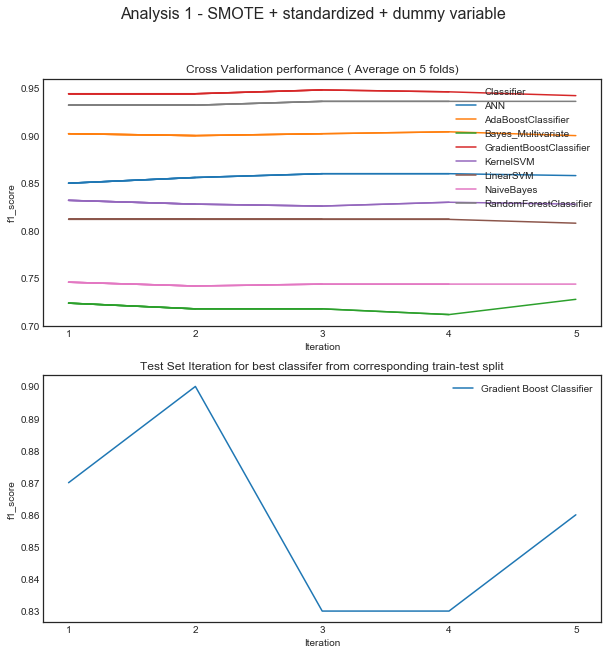

In [39]:
#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis1' + '.pkl'
scores_file = 'scoresDf_analysis1'+ '.pkl'
with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)

df_file = 'df_analysis1' + '.pkl'
df = pd.read_pickle(df_file)

#fig = plt.gcf()
#plt.subplot(1,1)
#fig.set_size_inches(12, 8)
collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
    #print("Analysis 1 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')
    
    

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'GradientBoostClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['GradientBoostClassifier']['best_pipe']
    
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=df.columns).sort_values(ascending=False)
#     sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis1_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis1_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)
    test_data_report_file = 'df_analysis1_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Gradient Boost Classifier')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 1 - SMOTE + standardized + dummy variable',fontsize=16)
fig.savefig('Analysis1.png')
Analysis_Result = pd.DataFrame()
data = [[collected_test_results.max()['f1_score'], 'Analysis 1']] 
Analysis1_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis1_perf,ignore_index=True)

In [41]:
Analysis_Result

,f1_score,Analysis
0,0.89,Analysis 1


### Analysis 2 - Use imbalanced class scnenario + standardized + dummy variable 

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_DummyVars_OneOut_NON_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_OneOut_NON_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)

outer_fold_analysis2 = []
scoresDf_analysis2 = []
for i in range(num_of_iter):
        outer_fold_analysis2.append({})
        scoresDf_analysis2.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of Analysis2')
    X_train, X_test, y_train, y_test = train_test_split(DfStandardized.values, DfTargetValue.values, test_size=0.2)
    
    outer_fold_analysis2[i], scoresDf_analysis2[i]  = main_loop(methods_str, hyperparams,
                                      X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis2_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis2_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=DfPredictors.columns).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
DfPredictors.to_pickle('df_analysis2.pkl')    
with open('outer_fold_analysis2.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis2, f)
with open('scoresDf_analysis2.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis2, t)        
###  Run saved models on test set 

                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.790      0.804   0.784   1607.8
AdaBoostClassifier          0.868      0.880   0.854   1607.8
Bayes_Multivariate          0.672      0.672   0.666   1607.8
GradientBoostClassifier     0.908      0.920   0.896   1607.8
KernelSVM                   0.736      0.816   0.710   1607.8
LinearSVM                   0.762      0.796   0.744   1607.8
NaiveBayes                  0.722      0.712   0.744   1607.8
RandomForestClassifier      0.884      0.908   0.870   1607.8


C:\Users\paliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\paliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.784      0.796   0.780   1607.8
AdaBoostClassifier          0.870      0.884   0.858   1607.8
Bayes_Multivariate          0.666      0.668   0.664   1607.8
GradientBoostClassifier     0.908      0.924   0.896   1607.8
KernelSVM                   0.744      0.828   0.716   1607.8
LinearSVM                   0.764      0.800   0.746   1607.8
NaiveBayes                  0.718      0.708   0.740   1607.8
RandomForestClassifier      0.886      0.908   0.870   1607.8
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.788      0.798   0.780   1607.8
AdaBoostClassifier          0.868      0.880   0.854   1607.8
Bayes_Multivariate          0.666      0.668   0.664   1607.8
GradientBoostClassifier     0.908      0.924   0.892   1607.8
KernelSV

C:\Users\paliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\paliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.792      0.800   0.784   1607.8
AdaBoostClassifier          0.872      0.884   0.858   1607.8
Bayes_Multivariate          0.676      0.674   0.680   1607.8
GradientBoostClassifier     0.904      0.922   0.888   1607.8
KernelSVM                   0.740      0.820   0.710   1607.8
LinearSVM                   0.760      0.796   0.738   1607.8
NaiveBayes                  0.716      0.710   0.742   1607.8
RandomForestClassifier      0.888      0.904   0.876   1607.8
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.798      0.808   0.792   1607.8
AdaBoostClassifier          0.868      0.880   0.858   1607.8
Bayes_Multivariate          0.674      0.674   0.676   1607.8
GradientBoostClassifier     0.904      0.924   0.888   1607.8
KernelSV

C:\Users\paliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


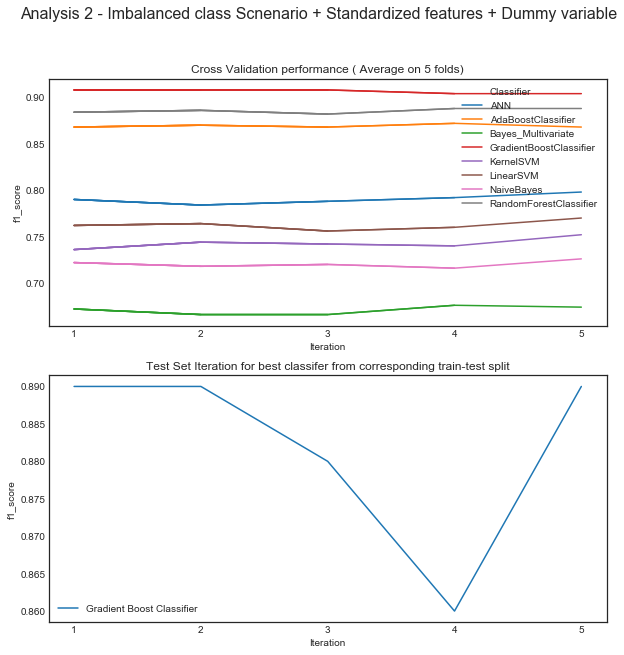

In [42]:
#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis2' + '.pkl'
scores_file = 'scoresDf_analysis2'+ '.pkl'
with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)

df_file = 'df_analysis2' + '.pkl'
df = pd.read_pickle(df_file)

collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)


for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
#    print("Analysis2 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'GradientBoostClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['GradientBoostClassifier']['best_pipe']
    
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=df.columns).sort_values(ascending=False)
#     sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis2_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis2_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    collected_test_results = collected_test_results.append(creport)
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)
   
    test_data_report_file = 'df_analysis2_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Gradient Boost Classifier')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 2 - Imbalanced class Scnenario + Standardized features + Dummy variable',fontsize=16)
fig.savefig('Analysis2.png')
data = [[collected_test_results.max()['f1_score'], 'Analysis 2']] 
Analysis2_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis2_perf,ignore_index=True)          

In [43]:
Analysis_Result

,f1_score,Analysis
0,0.90,Analysis 1
1,0.89,Analysis 2


### Analysis 3 - Use balanced class scnenario + standardized + one Hot encoding

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_Onehot_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_Onehot_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)

outer_fold_analysis3 = []
scoresDf_analysis3 = []
for i in range(num_of_iter):
        outer_fold_analysis3.append({})
        scoresDf_analysis3.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of Analysis3')
    X_train, X_test, y_train, y_test = train_test_split(DfStandardized.values, DfTargetValue.values, test_size=0.2)
    
    outer_fold_analysis3[i], scoresDf_analysis3[i]  = main_loop(methods_str, hyperparams,
                                      X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis3_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis3_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=DfPredictors.columns).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
DfPredictors.to_pickle('df_analysis3.pkl')    
with open('outer_fold_analysis3.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis3, f)
with open('scoresDf_analysis3.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis3, t)        

Analysis3 - Results of iteration 1
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.874      0.874   0.874   2344.6
AdaBoostClassifier          0.904      0.904   0.904   2344.6
Bayes_Multivariate          0.768      0.768   0.768   2344.6
GradientBoostClassifier     0.948      0.948   0.948   2344.6
KernelSVM                   0.844      0.846   0.844   2344.6
LinearSVM                   0.782      0.784   0.782   2344.6
NaiveBayes                  0.718      0.722   0.720   2344.6
RandomForestClassifier      0.936      0.936   0.936   2344.6
Analysis3 - Results of iteration 2
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.878      0.878   0.878   2344.6
AdaBoostClassifier          0.904      0.904   0.904   2344.6
Bayes_Multivariate          0.770      0.770   0.770   2344.6


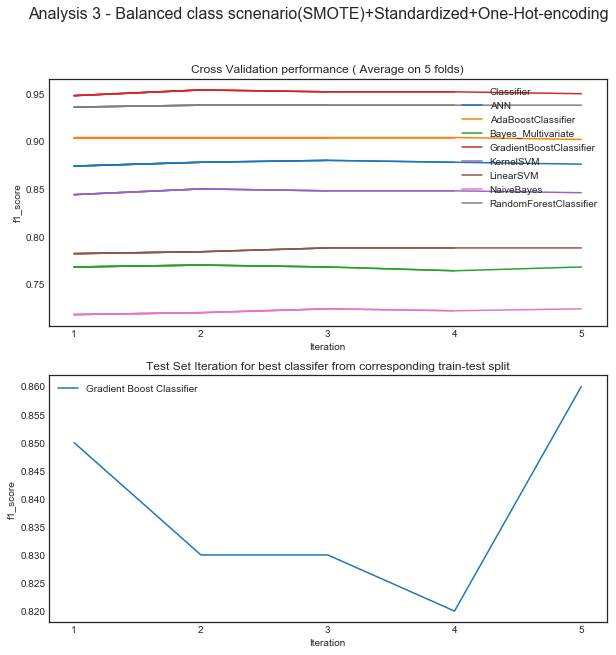

In [45]:
###  Run saved models on test set 

#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis3' + '.pkl'
scores_file = 'scoresDf_analysis3'+ '.pkl'

collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)


with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)

df_file = 'df_analysis3' + '.pkl'
df = pd.read_pickle(df_file)
for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
    print("Analysis3 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'GradientBoostClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['GradientBoostClassifier']['best_pipe']
    
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=df.columns).sort_values(ascending=False)
#     sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis3_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis3_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)

    test_data_report_file = 'df_analysis3_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Gradient Boost Classifier')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 3 - Balanced class scnenario(SMOTE)+Standardized+One-Hot-encoding',fontsize=16)
fig.savefig('Analysis3.png')
data = [[collected_test_results.max()['f1_score'], 'Analysis 3']] 
Analysis1_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis1_perf,ignore_index=True)           

In [46]:
Analysis_Result

,f1_score,Analysis
0,0.90,Analysis 1
1,0.89,Analysis 2
2,0.86,Analysis 3


### Analysis 4 - Use balanced class scnenario + Non standardized + dummy variable 

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_DummyVars_OneOut_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_OneOut_SMOTE["Employee Status"],columns=['Employee Status'])
# #Standardize predictors DataSet
# DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfPredictors,columns=DfPredictors.columns)
#DfScaledData = scale(DfPredictors)
#DfStandardized = DfPredictors



outer_fold_analysis4 = []
scoresDf_analysis4 = []
for i in range(num_of_iter):
        outer_fold_analysis4.append({})
        scoresDf_analysis4.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of analysis4')
    X_train, X_test, y_train, y_test = train_test_split(DfStandardized.values, DfTargetValue.values, test_size=0.2)
    
    outer_fold_analysis4[i], scoresDf_analysis4[i]  = main_loop(methods_str, hyperparams,
                                      X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis4_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis4_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=DfPredictors.columns).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
DfPredictors.to_pickle('df_analysis4.pkl')    
with open('outer_fold_analysis4.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis4, f)
with open('scoresDf_analysis4.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis4, t)
    
    


analysis4 - Results of iteration 1
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.850      0.850   0.850   2344.6
AdaBoostClassifier          0.896      0.898   0.896   2344.6
Bayes_Multivariate          0.662      0.684   0.668   2344.6
GradientBoostClassifier     0.942      0.942   0.942   2344.6
KernelSVM                   0.824      0.824   0.824   2344.6
LinearSVM                   0.804      0.808   0.804   2344.6
NaiveBayes                  0.742      0.742   0.742   2344.6
RandomForestClassifier      0.932      0.932   0.932   2344.6
analysis4 - Results of iteration 2
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.858      0.858   0.858   2344.6
AdaBoostClassifier          0.902      0.902   0.902   2344.6
Bayes_Multivariate          0.694      0.706   0.698   2344.6


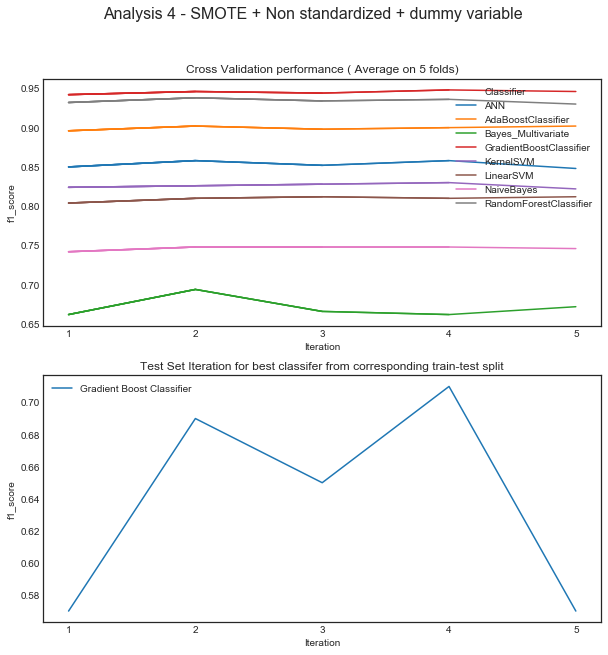

In [48]:
###  Run saved models on test set 

collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)


#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis4' + '.pkl'
scores_file = 'scoresDf_analysis4'+ '.pkl'
with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)

df_file = 'df_analysis4' + '.pkl'
df = pd.read_pickle(df_file)
for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
    print("analysis4 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'GradientBoostClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['GradientBoostClassifier']['best_pipe']
    
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=df.columns).sort_values(ascending=False)
#     sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis4_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis4_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)

    test_data_report_file = 'df_analysis4_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Gradient Boost Classifier')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 4 - SMOTE + Non standardized + dummy variable',fontsize=16)
fig.savefig('Analysis4.png')
data = [[collected_test_results.max()['f1_score'], 'Analysis 4']] 
Analysis4_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis4_perf,ignore_index=True)           

In [49]:
Analysis_Result

,f1_score,Analysis
0,0.90,Analysis 1
1,0.89,Analysis 2
2,0.86,Analysis 3
3,0.71,Analysis 4


### Analysis 5 - Use Best Combination from analysis 1 ( Dumy , SMOTE and Standardized ) upto 4 + MDA (kernel SVM , SVM and linear classifiers becomes best performing and not Random forest classifier )

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_DummyVars_OneOut_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_OneOut_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)



import numpy as np

# def get_class_data(dataset,label,index):
#     #Split the data into different class 
#     class_data = dataset[:,index] == label 
#     return dataset[class_data]

def get_scatter_matrix(dataset):    
    mean_vector = np.mean(dataset,axis = 0)    #Calculate Mean 
    Z = np.subtract(dataset,mean_vector.reshape(1,mean_vector.shape[0])) #Subtract mean vector from dataset 
    S = np.matmul(np.transpose(Z),Z)
    return S

#datasets = read_imox_dataset('./imox_data.txt')


outer_fold_analysis5 = []
scoresDf_analysis5 = []

Class1 = DfStandardized.values[np.argwhere(DfTargetValue.values==1).flatten()]
Class2 = DfStandardized.values[np.argwhere(DfTargetValue.values==0).flatten()] 



#get scatter matrix 
scatter_matrix_1 = get_scatter_matrix(Class1)
#get scatter matrix 
scatter_matrix_2 = get_scatter_matrix(Class2)


#Calculate SW  within scatter matrix 
SW = scatter_matrix_1 + scatter_matrix_2

mu = np.mean(DfStandardized.values,axis=0)

#Calculate between scatter matrix 
mu1 = np.mean(Class1,axis=0)
mu2 = np.mean(Class2,axis=0)
SB1 = Class1.shape[0]*np.outer((mu1-mu),(mu1-mu))
SB2 = Class2.shape[0]*np.outer((mu2-mu),(mu2-mu))

SB = SB1 + SB2 

#calculate W 
W = np.matmul(np.linalg.inv(SW),SB) 

eigVal,EigVec = np.linalg.eigh(W)
#Get index of first and second eigen values to get corresponding eigen vectors
c = np.argsort(eigVal)
index_first_eig = c[-1]
index_second_eig = c[-2]
#Get first and second principal component vectors 
pc_1 = EigVec[:,index_first_eig]
pc_2 = EigVec[:,index_second_eig]
#Report 
#Create Projection matrix 
transform_matrix = np.column_stack([pc_1,pc_2])
#Project data using the two components
projected_data = np.matmul(DfStandardized.values , transform_matrix)
#projected data with labels 
#projected_data_labels = np.append(projected_data,DfTargetValue.values[:,-1].reshape(DfTargetValue.values.shape[0],1),axis=1)










for i in range(num_of_iter):
        outer_fold_analysis5.append({})
        scoresDf_analysis5.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of analysis5')
    
    
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(projected_data, DfTargetValue.values, test_size=0.2)
    
    
#     npData = np.array(X_train)
#     npTarget = np.array(DfTargetValue.values)
#     datasets = np.append(npData,npTarget.reshape(npData.shape[0],1),axis=1)

#     #remove labels 
#     data_no_label = datasets[:,0:-1]
#     #get samples per class 1 
#     Class1 = get_class_data(datasets,1,datasets.shape[1]-1 )[:,0:-1]
#     #get samples per class 2 
#     Class2 = get_class_data(datasets,0,datasets.shape[1]-1)[:,0:-1]
    

   
    outer_fold_analysis5[i], scoresDf_analysis5[i]  = main_loop(methods_str, hyperparams,
                                       X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis5_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis5_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=None).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
#DfPredictors.to_pickle('df_analysis5.pkl')    
with open('outer_fold_analysis5.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis5, f)
with open('scoresDf_analysis5.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis5, t)
    
    


### Test Set Results using Kernel SVM for above analysis ( not as good as Random Forest )

analysis5 - Results of iteration 1
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.774      0.780   0.774   2344.6
AdaBoostClassifier          0.766      0.776   0.774   2344.6
Bayes_Multivariate          0.748      0.764   0.750   2344.6
GradientBoostClassifier     0.758      0.762   0.760   2344.6
KernelSVM                   0.772      0.786   0.774   2344.6
LinearSVM                   0.772      0.776   0.772   2344.6
NaiveBayes                  0.776      0.778   0.776   2344.6
RandomForestClassifier      0.760      0.764   0.760   2344.6
analysis5 - Results of iteration 2
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.780      0.786   0.782   2344.6
AdaBoostClassifier          0.776      0.782   0.776   2344.6
Bayes_Multivariate          0.748      0.748   0.748   2344.6


C:\Users\paliwal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


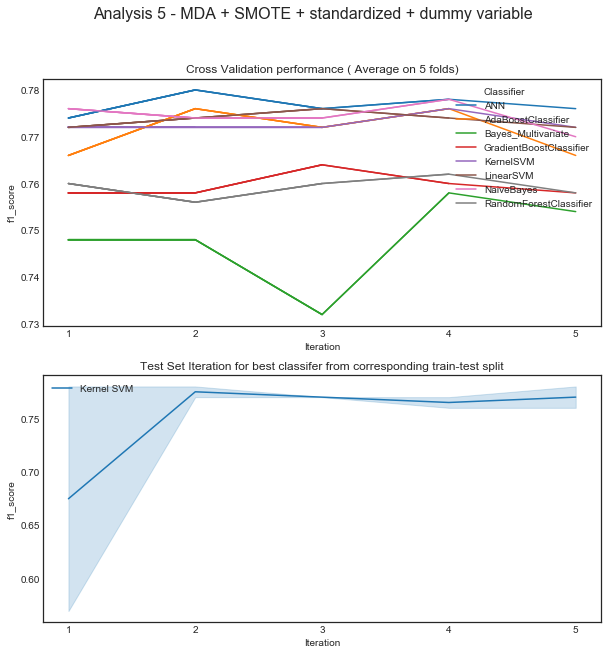

In [51]:
###  Run saved models on test set 

#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis5' + '.pkl'
scores_file = 'scoresDf_analysis5'+ '.pkl'
collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)
with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)

# df_file = 'df_analysis5' + '.pkl'
# df = pd.read_pickle(df_file)
for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
    print("analysis5 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')
	

    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'KernelSVM']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['KernelSVM']['best_pipe']
    
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=df.columns).sort_values(ascending=False)
#     sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis5_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis5_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)


    test_data_report_file = 'df_analysis5_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Kernel SVM')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 5 - MDA + SMOTE + standardized + dummy variable',fontsize=16)
fig.savefig('Analysis5.png')
data = [[collected_test_results.max()['f1_score'], 'Analysis 5']] 
Analysis5_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis5_perf,ignore_index=True)           

In [52]:
Analysis_Result

,f1_score,Analysis
0,0.90,Analysis 1
1,0.89,Analysis 2
2,0.86,Analysis 3
3,0.71,Analysis 4
4,0.78,Analysis 5


### Analysis 6 - Use Best Combination from analysis 1 upto 4 ( Standardized , Dummy and SMOTE )+ Whitening Transform - Random forest not as good and Bayes independent drops significantly)

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_DummyVars_OneOut_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_OneOut_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)

DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)
#Set the model
pca = PCA(whiten=True)
#Transform the data using PCA 
DfStandardizedf64 = DfStandardized.astype('float64')
Transformed_Data_Whiten = pca.fit_transform(DfStandardizedf64.values)
TransfromedDf = pd.DataFrame(Transformed_Data_Whiten, columns=DfPredictors.columns)





outer_fold_analysis6 = []
scoresDf_analysis6 = []
for i in range(num_of_iter):
        outer_fold_analysis6.append({})
        scoresDf_analysis6.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of Analysis 1')
    X_train, X_test, y_train, y_test = train_test_split(TransfromedDf.values, DfTargetValue.values, test_size=0.2)
    
    outer_fold_analysis6[i], scoresDf_analysis6[i]  = main_loop(methods_str, hyperparams,
                                      X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis6_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis6_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=DfPredictors.columns).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
DfPredictors.to_pickle('df_analysis6.pkl')    
with open('outer_fold_analysis6.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis6, f)
with open('scoresDf_analysis6.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis6, t) 




### Using ANN as best from previous validation run 

Analysis 6 - Results of iteration 1
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.858      0.858   0.858   2344.6
AdaBoostClassifier          0.792      0.794   0.794   2344.6
Bayes_Multivariate          0.734      0.734   0.734   2344.6
GradientBoostClassifier     0.844      0.844   0.844   2344.6
KernelSVM                   0.834      0.834   0.834   2344.6
LinearSVM                   0.810      0.816   0.810   2344.6
NaiveBayes                  0.734      0.736   0.734   2344.6
RandomForestClassifier      0.836      0.836   0.836   2344.6
Analysis 6 - Results of iteration 2
                         f1_score  precision  recall  support
Classifier                                                   
ANN                         0.856      0.856   0.856   2344.6
AdaBoostClassifier          0.796      0.798   0.796   2344.6
Bayes_Multivariate          0.726      0.726   0.726   2344.

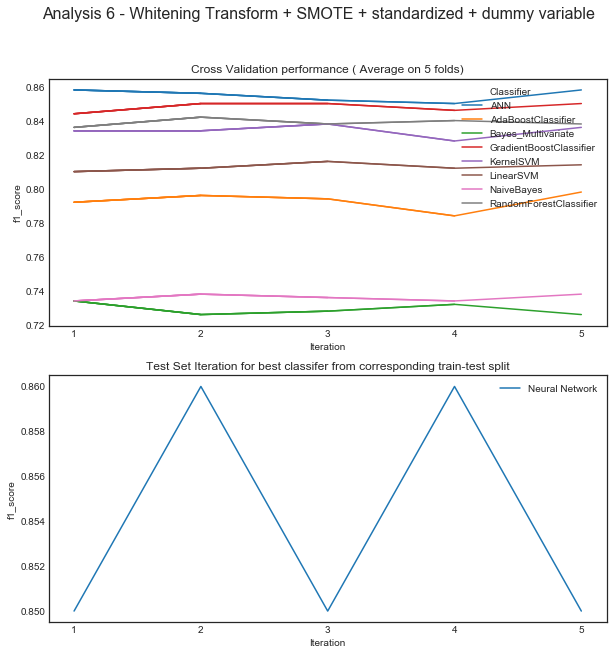

In [54]:
#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis6' + '.pkl'
scores_file = 'scoresDf_analysis6'+ '.pkl'
with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)
    
collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)    

df_file = 'df_analysis6' + '.pkl'
df = pd.read_pickle(df_file)
for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
    print("Analysis 6 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'ANN']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['ANN']['best_pipe']
    
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=df.columns).sort_values(ascending=False)
#     sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
#     # Add labels to your graph
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title("Visualizing Important Features")
#     plt.legend()
#     plt.show()
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis6_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis6_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)

    test_data_report_file = 'df_analysis6_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Neural Network')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 6 - Whitening Transform + SMOTE + standardized + dummy variable',fontsize=16)
fig.savefig('Analysis6.png')
data = [[collected_test_results.max()['f1_score'], 'Analysis 6']] 
Analysis6_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis6_perf,ignore_index=True)   

### Analysis 7 - Use Best Combination upto Analysis 6 + Drop correlated features using correlation Heatmap

In [ ]:
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["Bayes_Multivariate", "NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "AdaBoostClassifier", "GradientBoostClassifier", "ANN"]
#methods_str = ["NaiveBayes" , "LinearSVM" , "KernelSVM" , "RandomForestClassifier" , "ANN"]
#methods_str = ["Bayes_Multivariate", "Bayes_Independent_Features", "Parzen_Window"]
#methods_str = ["Parzen_Window"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()
hyperparams["AdaBoostClassifier"] = ()
hyperparams["GradientBoostClassifier"] = ()
hyperparams["LinearSVM"] = ()
hyperparams["KernelSVM"] = ()
hyperparams["NaiveBayes"] = (1e-8, 1e-7, 1e-6, 1e-5, 1e-4)
hyperparams["ANN"] = ()
hyperparams["Bayes_Multivariate"] = ()
hyperparams["Bayes_Independent_Features"] = ()


num_of_iter = 5
DfPredictors =  Df_DummyVars_OneOut_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_OneOut_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)

DfDroppedCorrelated = DfStandardized.drop(["Years Of Service","Years in Position","Hourly_Rate","Marital Status_Married"],axis=1)

outer_fold_analysis8 = []
scoresDf_analysis8 = []
for i in range(num_of_iter):
        outer_fold_analysis8.append({})
        scoresDf_analysis8.append({})        
for i in range(num_of_iter):
    print('Running iteration ' , str(i+1) , 'of Analysis 1')
    X_train, X_test, y_train, y_test = train_test_split(DfDroppedCorrelated.values, DfTargetValue.values, test_size=0.2)
    
    outer_fold_analysis8[i], scoresDf_analysis8[i]  = main_loop(methods_str, hyperparams,
                                      X_train,  y_train)
    #Store test data of this split to test classifiers 
    X_test_file = 'df_analysis8_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis8_Ytest' + str(i) + '.pkl' 
    pd.DataFrame(X_test,columns=DfDroppedCorrelated.columns).to_pickle(X_test_file)
    pd.DataFrame(y_test,columns=DfTargetValue.columns).to_pickle(Y_test_file)
        
DfPredictors.to_pickle('df_analysis8.pkl')    
with open('outer_fold_analysis8.pkl', 'wb') as f:
    pickle.dump(outer_fold_analysis8, f)
with open('scoresDf_analysis8.pkl', 'wb') as t:
    pickle.dump(scoresDf_analysis8, t)    

Analysis 8 - Results of iteration 1
                            precision  recall  f1_score  support
Classifier                                                      
ANN                             0.796   0.782     0.788   1607.8
Bayes_Independent_Features      0.642   0.644     0.642   1607.8
Bayes_Multivariate              0.670   0.664     0.666   1607.8
KernelSVM                       0.824   0.702     0.728   1607.8
LinearSVM                       0.794   0.736     0.756   1607.8
NaiveBayes                      0.734   0.748     0.738   1607.8
RandomForestClassifier          0.908   0.868     0.886   1607.8
Analysis 8 - Results of iteration 2
                            precision  recall  f1_score  support
Classifier                                                      
ANN                             0.802   0.784     0.790   1607.8
Bayes_Independent_Features      0.612   0.638     0.612   1607.8
Bayes_Multivariate              0.668   0.684     0.672   1607.8
KernelSVM         

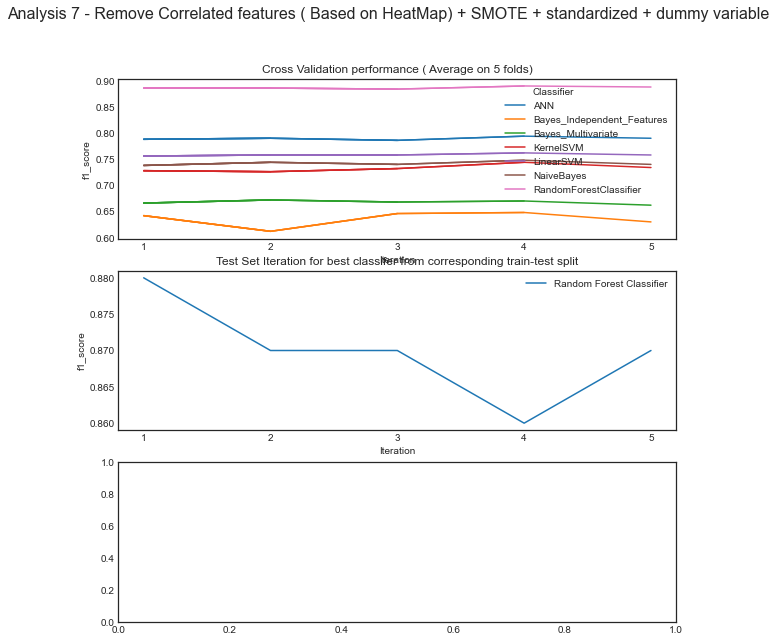

In [61]:
#Performance per fold
num_of_iter = 5
outerfold_file = 'outer_fold_analysis8' + '.pkl'
scores_file = 'scoresDf_analysis8'+ '.pkl'
with open(outerfold_file, 'rb') as f:
    outer_fold = pickle.load(f)
with open(scores_file, 'rb') as t:
    scoresDf = pickle.load(t)
    
collected_results = pd.DataFrame()
collected_test_results = pd.DataFrame()
plt.style.use('seaborn-white')
fig, axs = plt.subplots(3)
fig.set_figheight(10)
fig.set_figwidth(10)    

df_file = 'df_analysis8' + '.pkl'
df = pd.read_pickle(df_file)
for i in range(num_of_iter): 


#     scoresDfIndexed = scoresDf[i].set_index(['Fold','Classifier'])
#     print(scoresDfIndexed)

    #Vaerage performance for all classifiers
    
    print("Analysis 8 - Results of iteration " + str(i+1) , )
    
    Formatted = scoresDf[i].groupby(['Classifier']).mean()
    total_avg = Formatted.drop("Fold",axis = 1 )
    print(total_avg)
    total_avg['Iteration'] = i+1
    collected_results = collected_results.append(total_avg)
    sns_plot = sb.lineplot(x="Iteration", y="f1_score" , hue = 'Classifier', data = collected_results.reset_index(),ax=axs[0])
    handles, labels = sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles[:9], labels[:9],loc='upper right')
    sns_plot.set_xticks([1,2,3,4,5])
    sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')

    #Plot per fold
#     MoreFormatted = scoresDf[0].groupby(['Classifier','Fold']).mean()
#     sb.barplot(y="Classifier", x="f1_score", hue="Fold", data=MoreFormatted.reset_index(),palette='hls')
#     plt.show()



    #Get Best classifier 
    maxIndex = scoresDf[i].loc[scoresDf[i]['Classifier'] == \
                            'GradientBoostClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[i].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[i][bestFoldIndex]['GradientBoostClassifier']['best_pipe']
#     DfDroppedCorrelated = df.drop(["Years Of Service","Years in Position","Hourly_Rate","Marital Status_Married"],axis=1)
#     feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
#                              index=DfDroppedCorrelated.columns).sort_values(ascending=False)
#     features = sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index,ax=axs[2])
#     # Add labels to your graph
#     features.set_xlabel('Feature Importance Score')
#     features.set_ylabel('Features')
#     features.set_title("Visualizing Important Features")
#     features.legend()
#     #features.savefig('Feature_Imp.png')
    
    RFmyModel = bestRFModel.steps[1][1] 
    #read test data for that iteration and report scores 
    X_test_file = 'df_analysis8_Xtest' + str(i) + '.pkl' 
    Y_test_file = 'df_analysis8_Ytest' + str(i) + '.pkl' 
    X_test = pd.read_pickle(X_test_file)
    y_test = pd.read_pickle(Y_test_file) 
    report = classification_report(y_test,RFmyModel.predict(X_test))    
    scores = []
    lines = report.split('\n')
    row = {}
    row_data = lines[6].split()
    row['precision'] = float(row_data[2])
    row['recall'] = float(row_data[3])
    row['f1_score'] = float(row_data[4])
    row['support'] = float(row_data[5])
    scores.append(row)          
    creport = pd.DataFrame.from_dict(scores)            
    #creport = creport.transpose()
    creport['Iteration'] = i+1
    collected_test_results = collected_test_results.append(creport)


    test_data_report_file = 'df_analysis8_Testscore'+ str(i) + '.tex' 
    with open(test_data_report_file, 'w') as tf:
        tf.write(creport.to_latex(index=False))
        
    #print('Results on test set',creport) 
sns_plotb = sb.lineplot(x="Iteration", y="f1_score" , data = collected_test_results.reset_index() ,ax=axs[1],label = 'Gradient Boost Classifier')

sns_plotb.set_xticks([1,2,3,4,5])
sns_plotb.set_title('Test Set Iteration for best classifer from corresponding train-test split')
sns_plot.legend(handles[:9], labels[:9],loc='upper right')
fig.suptitle('Analysis 7 - Remove Correlated features ( Based on HeatMap) + SMOTE + standardized + dummy variable',fontsize=16)
fig.savefig('Analysis8.png')
data = [[collected_test_results.max()['f1_score'], 'Analysis 7']] 
Analysis8_perf = pd.DataFrame(data, columns=['f1_score','Analysis'])
Analysis_Result = Analysis_Result.append(Analysis8_perf,ignore_index=True)        

### Best Features from above 

In [66]:
Analysis_Result

,f1_score,Analysis
0,0.90,Analysis 1
1,0.89,Analysis 2
2,0.86,Analysis 3
3,0.71,Analysis 4
4,0.78,Analysis 5
5,0.86,Analysis 6
6,0.91,Analysis 7


In [ ]:
    #Get Best classifier 
    maxIndex = scoresDf[2].loc[scoresDf[2]['Classifier'] == \
                            'RandomForestClassifier']['f1_score'].idxmax()
    bestFoldIndex = scoresDf[2].iloc[maxIndex]['Fold'] - 1 
    bestRFModel = \
        outer_fold[2][bestFoldIndex]['RandomForestClassifier']['best_pipe']
    DfDroppedCorrelated = df.drop(["Years Of Service","Years in Position","Hourly_Rate","Marital Status_Married"],axis=1)
    feature_imp =  pd.Series(bestRFModel.steps[1][1].feature_importances_,
                             index=DfDroppedCorrelated.columns).sort_values(ascending=False)
    sb.barplot(x=feature_imp[1:20], y=feature_imp[1:20].index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.savefig('important_features.png')
    plt.show()
    

### Plots of performance of best classifiers ( based on test sets )from all analysis 

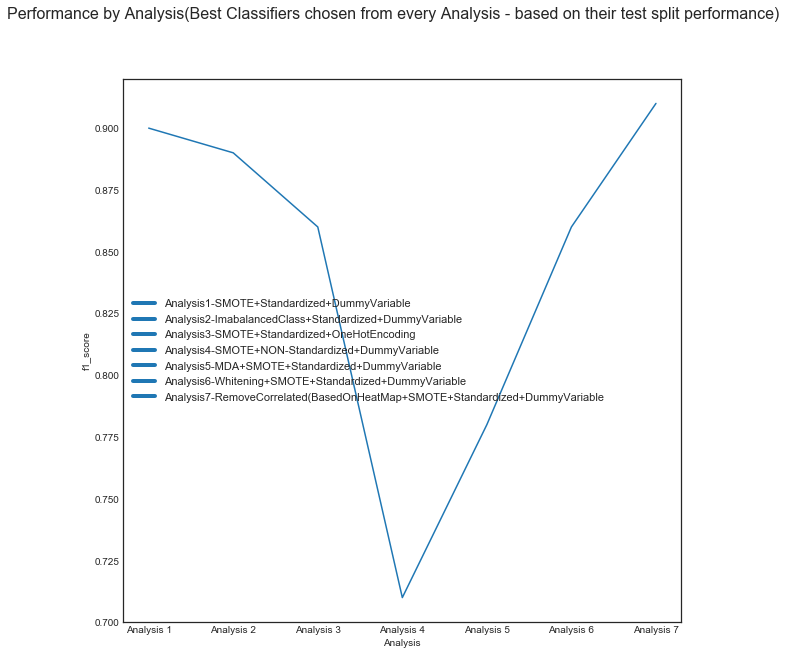

In [68]:
from matplotlib.lines import Line2D
plt.style.use('seaborn-white')
fig, axs = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)    
sns_plot = sb.lineplot(x="Analysis", y="f1_score" , data = Analysis_Result.reset_index(),ax=axs)
#labels = np.array()
#handles, labels = sns_plot.get_legend_handles_labels()
#labels = legend((line1, line2, line3), ('label1', 'label2', 'label3'))
custom_lines = [Line2D([0], [0],  lw=4),
                Line2D([0], [0],  lw=4),
                Line2D([0], [0],  lw=4),
                Line2D([0], [0],  lw=4),
                Line2D([0], [0],  lw=4),
                Line2D([0], [0],  lw=4),
                Line2D([0], [0],  lw=4)
               ]

sns_plot.legend(custom_lines, ['Analysis1-SMOTE+Standardized+DummyVariable', 'Analysis2-ImabalancedClass+Standardized+DummyVariable', 'Analysis3-SMOTE+Standardized+OneHotEncoding','Analysis4-SMOTE+NON-Standardized+DummyVariable','Analysis5-MDA+SMOTE+Standardized+DummyVariable','Analysis6-Whitening+SMOTE+Standardized+DummyVariable','Analysis7-RemoveCorrelated(BasedOnHeatMap+SMOTE+Standardized+DummyVariable'],loc='center left',fontsize =11)
#sns_plot.set_xticks([1,2,3,4,5])
#sns_plot.set_title('Cross Validation performance ( Average on 5 folds)')
fig.suptitle('Performance by Analysis(Best Classifiers chosen from every Analysis - based on their test split performance)',fontsize=16)
fig.savefig('Final_perf.png')

In [1]:
#This cell is for getting a classifier that can be used to determine when an employee will leave in the future
#Function to optimize hyperparameters for classifier 
def optimize_hyperparam_r(method, hyperparams_particular,
                        inner_cv, X_train, y_train):
    
    best_params = {}
    
    if method == "RandomForestClassifier":   
        best_pipe = callRandomForestClassifier_r(X_train, y_train,
                                                            inner_cv)    
        return best_pipe
    if method == "AdaBoostClassifier":   
        best_pipe = callAdaBoostClassifier_r(X_train, y_train,
                                                            inner_cv)    
        return best_pipe
    if method == "GradientBoostClassifier":   
        best_pipe = callGradientBoostClassifier_r(X_train, y_train,
                                                            inner_cv)    
        return best_pipe
    elif method == "LinearSVM":
        best_pipe = callLinearSVMClassifier_r(X_train, y_train,
                                                         inner_cv)    
        return best_pipe
    elif method == "KernelSVM":
        best_pipe = callKernelSVMClassifier_r(X_train, y_train,
                                                         inner_cv)    
        return best_pipe
    
    else:    
        best_pipe = callANNClassifier_r(X_train, y_train, inner_cv)    
        return  best_pipe    
    




def main_loop_r(methods_str, hyperparams, X, y):    
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

    outer_fold = []
    scores = []
    for i in range(5):
        outer_fold.append({})
    
    train_idx, test_idx = next(outer_cv.split(X, y))
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for method in methods_str:            
        best_pipe = optimize_hyperparam_r(method, hyperparams[method],
                                                            inner_cv,
                                                            X_train,
                                                            y_train)
                # Use best lambda on X_train to train model
                # We are skipping tuning of hyperparameters for SVMs due to time and space complexity  and bestpipe is already a trained model on X training                                
        if method != 'LinearSVM' and method != 'KernelSVM' and method != 'ANN':             
            best_pipe.fit(X_train, y_train.ravel())
    return best_pipe 
 
    

def callRandomForestClassifier_r(X_train,Y_train, inner_cv) :

    # Number of trees in random forest
#     n_estimators = [int(x) for x in np.linspace(start = 200,
#                                                 stop = 2000,
#                                                 num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {
        #'rf__n_estimators': n_estimators,
                   'rf__max_features': max_features,
                   'rf__max_depth': max_depth,
                   'rf__min_samples_split': min_samples_split,
                   'rf__min_samples_leaf': min_samples_leaf,
                   'rf__bootstrap': bootstrap}        

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state=42))
        ])
    
    
    rf_random = RandomizedSearchCV(pipe, random_grid, n_iter = 10,
                                   cv = inner_cv, verbose=0,
                                   random_state=42, n_jobs = -1,
                                   scoring='accuracy')
    
    # Fit the random search model
    rf_random.fit(X_train,Y_train.ravel())    
    return rf_random.best_estimator_

def callAdaBoostClassifier_r(X_train,Y_train, inner_cv) :       

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('ab', AdaBoostClassifier(random_state=42))
        ])
    
    return pipe

def callGradientBoostClassifier_r(X_train,Y_train, inner_cv) :
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Create the random grid
    random_grid = {
        #'gb__n_estimators': n_estimators,
                   'gb__max_features': max_features,
                   'gb__max_depth': max_depth,
                   'gb__min_samples_split': min_samples_split,
                   'gb__min_samples_leaf': min_samples_leaf}        

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('gb', GradientBoostingClassifier(random_state=42))
        ])
    
    gb_random = RandomizedSearchCV(pipe, random_grid, n_iter = 10,
                                   cv = inner_cv, verbose=0,
                                   random_state=42, n_jobs = -1,
                                   scoring='accuracy')
    
    # Fit the random search model
    gb_random.fit(X_train,Y_train.ravel())    
    return gb_random.best_estimator_


def callLinearSVMClassifier_r(X_train,Y_train, inner_cv) :
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', LinearSVC())
        ])
    
    pipe.fit(X_train,Y_train.ravel())    
    
    return pipe 


def callKernelSVMClassifier_r(X_train,Y_train, inner_cv) :
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC())
        ])
    
    pipe.fit(X_train,Y_train.ravel()) 
    return pipe 

def callANNClassifier_r(X_train,Y_train, inner_cv) :

    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('ann', MLPClassifier())
         ])
     
    pipe.fit(X_train,Y_train.ravel())
    return pipe

In [ ]:
# In this cell we generate data to pass to the function in the cell above
# to obtain a classifier to use for predicting how long an employee will stay

import pandas as pd
MyEmptydf = pd.DataFrame() ;
DfCategoricalUnmodified, OriginalDfUnmodified, DfwithoutTermReason, Df_DummyVars_SMOTE, Df_DummyVars_OneOut_SMOTE, Df_Onehot_SMOTE, Df_DummyVars_NON_SMOTE, Df_DummyVars_OneOut_NON_SMOTE, Df_Onehot_NON_SMOTE = prepare_data(True, MyEmptydf)

methods_str = ["RandomForestClassifier"]
hyperparams = {}
hyperparams["RandomForestClassifier"] = ()

num_of_iter = 1
DfPredictors =  Df_DummyVars_SMOTE.drop("Employee Status",axis = 1 )
DfTargetValue = pd.DataFrame(data = Df_DummyVars_SMOTE["Employee Status"],columns=['Employee Status'])
#Standardize predictors DataSet
DfScaledData = scale(DfPredictors)
DfStandardized = pd.DataFrame(DfScaledData,columns=DfPredictors.columns)
outer_fold_analysis1 = []
scoresDf_analysis1 = []
for i in range(num_of_iter):
        outer_fold_analysis1.append({})
        scoresDf_analysis1.append({})        

X_train, X_test, y_train, y_test = train_test_split(DfStandardized.values, DfTargetValue.values, test_size=0.2)
    
classifier = main_loop_r(methods_str, hyperparams, X_train,  y_train)

In [ ]:
# Predict how long an employee will stay
def get_years_until_departure(employee, classifier, salary_increase_rate=None, annual_promotion_rate=None,
                              years_in_level=None, years_in_curent_salary=None, years_in_position=None, 
                              total_number_of_supervisors=None, last_recent_hike=None):
    empoyee = employee.copy()
    is_staying = classifier.predict(employee.values.reshape((1,len(employee))))[0]
    years = 0
    if is_staying:
        
        if salary_increase_rate:
            employee['total % salary increase since joined every year'] = salary_increase_rate
        if years_in_level:
            employee['Years in Level'] = years_in_level
        if years_in_position:
            employee['Years in Position'] = years_in_position
        if years_in_curent_salary:
            employee['Years in curent salary'] = years_in_curent_salary
        if total_number_of_supervisors:
            employee['total_number_of_supervisors'] = total_number_of_supervisors
        if last_recent_hike:
            employee['Last Percent hike in salary'] = last_recent_hike
        
        while is_staying and years <= 50:
            # add years
            if annual_promotion_rate:
                DfStay['Total_number_of_Promotions'] += 5*annual_promotion_rate
            DfStay['Years Of Service'] += 5
            DfStay['Years Until Retirement Eligib'] -= 5

            years += 5
            is_staying = classifier.predict(employee.values.reshape((1,len(employee))))[0]
        while not is_staying and years >=0:
            if annual_promotion_rate:
                DfStay['Total_number_of_Promotions'] -= annual_promotion_rate
            DfStay['Years Of Service'] -= 1
            DfStay['Years Until Retirement Eligib'] += 1
            years -= 1
            is_staying = classifier.predict(employee.values.reshape((1,len(employee))))[0]
    return years



In [ ]:
# Get the estimate for the first employee
DfStay = DfStandardized.loc[DfTargetValue.loc[:,'Employee Status'] == 1,:]

years = get_years_until_departure(DfStay.loc[1,:], classifier, salary_increase_rate=0.25, annual_promotion_rate=None,
years_in_level=23, years_in_curent_salary=23, years_in_position=23,
total_number_of_supervisors=None, last_recent_hike=0.5)
print(years)